# Final Exam – DATA 3401 (Fall 2022)

In [2]:

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import math

# Exercise 1

## Part 1
Open the abalone.names file in your notebook. Using the information there, in a new cell briefly describe the data set and relevant features.

In [3]:
print(open('abalone.names','r').read())

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

### The data provides information on abalones which are a kind of marine snail. This study utilizes 4177 observations of abalone and organizes it with 9 listed attributes (sex, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, rings)

## Part 2 & 3

In [4]:
data = pd.read_csv('abalone.data', header = None)
data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'class']
data

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Part 4

In [5]:
labels = data.iloc[:,-1]
labels

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: class, Length: 4177, dtype: int64

In [6]:
labels.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: class, dtype: int64

### Abalones have a normal distribution amongst classes. 

### One of the ways to consolidate would be to remove alot of the weights. I feel it to be unnessecary to weigh the snais so many times. One general weight should do. Also "shucked weight" is weird. Is it measuring the shell or the actual snail? It doesnt specifty so it is irrelevent information. I am going to remove several of the weights in order to consolidate information.

In [7]:
new_data = data.drop(['shucked_weight'], axis = 1)
newnew_data = new_data.drop(['viscera_weight'], axis = 1)
df = newnew_data[newnew_data.sex != 'I']
df.head()


,sex,length,diameter,height,whole_weight,shell_weight,class
0,M,0.455,0.365,0.095,0.5140,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.155,10
6,F,0.530,0.415,0.150,0.7775,0.330,20


In [8]:
labels = df.iloc[:,-1]
labels

0       15
1        7
2        9
3       10
6       20
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: class, Length: 2835, dtype: int64

In [9]:
labels.value_counts()

10    542
9     516
11    425
8     294
12    246
13    179
7     124
14    112
15     93
16     60
17     51
6      43
18     37
19     30
20     24
5      15
21     13
23      9
22      6
4       6
3       3
27      2
24      2
26      1
29      1
25      1
Name: class, dtype: int64

## Part 5
### Make a scatterplot of each feature against the others (it should be a single plot) Describe any trends or correlations that you see.

In [10]:
sex = df.iloc[:,0]
length = df.iloc[:,1]
diameter = df.iloc[:,2]
height = df.iloc[:,3]
weight = df.iloc[:,4]
shell_weight = df.iloc[:,5]
labels = df.iloc[:,-1]

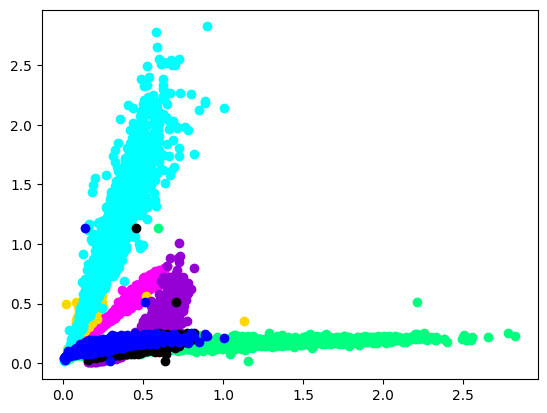

In [14]:
x = np.array(diameter)
y = np.array(length)
plt.scatter(x, y, color = 'magenta')

x = np.array(height)
y = np.array(diameter)
plt.scatter(x, y, color = 'gold')

x = np.array(weight)
y = np.array(height)
plt.scatter(x, y, color = 'springgreen')

x = np.array(shell_weight)
y = np.array(weight)
plt.scatter(x, y, color = 'cyan')

x = np.array(length)
y = np.array(shell_weight)
plt.scatter(x, y, color = 'darkviolet')

x = np.array(length)
y = np.array(height)
plt.scatter(x, y, color = 'black')

x = np.array(shell_weight)
y = np.array(height)
plt.scatter(x, y, color = 'blue')

### this graph shows the distribution of each characteristic amongst classes. NOTE: The sex didnt work for the graph, as it isnt in the same measurement as the others so If it is desired I have represented it in the next graph

## Part 6

In [11]:
whole_weight = df.iloc[:,4]

for i in whole_weight:
    if i >= 1:
        whole_weight.replace((i), ('Greater'), inplace=True)
    if i < 1:
        whole_weight.replace((i), ('Lesser'), inplace=True)
        
whole_weight

0        Lesser
1        Lesser
2        Lesser
3        Lesser
6        Lesser
         ...   
4172     Lesser
4173     Lesser
4174    Greater
4175    Greater
4176    Greater
Name: whole_weight, Length: 2835, dtype: object

       M    F
sex  730  693
sex  798  614
                       M    F
Greater than 1 gram  730  693
Less than 1 gram     798  614


<AxesSubplot: >

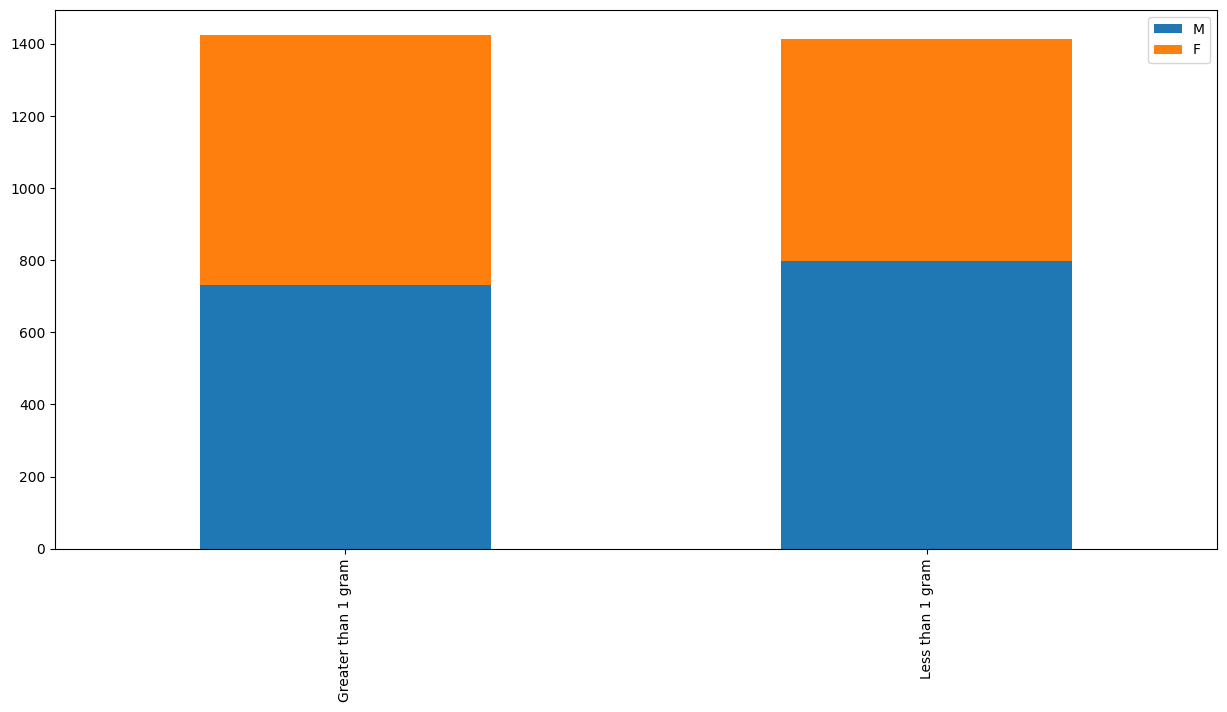

In [12]:
Greater = df[df['whole_weight']=='Greater']['sex'].value_counts()
Lesser = df[df['whole_weight']=='Lesser']['sex'].value_counts()
df = pd.DataFrame([Greater,Lesser])
print(df)
df.index = ['Greater than 1 gram','Less than 1 gram']
print(df)
df.plot(kind='bar', stacked=True, figsize=(15,7))

### Conclusion

### This shows that the weight of abalones does not have a large difference whether the abalone is a male or female. However it does show that females are slightly more likely to be less than 1 gram than males.

# Exercise 2

## Part 1.A

In [13]:
year = np.arange(0, 1000)#had to do 1000 because it doesnt show the given value in the array

#this also works
def List_function(n):
    list_array = []
    for i in range(n+1):
        list_array.append(i)
    return(list_array)
 #print(List_function(1000))
    
year

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Part 1.B

In [14]:
def cont_comp(array):
    annual_amount = []
    p = 0.01
    r = 0.05
    e = math.e
    
    for i in array:
        total = p * e**(r * i)
        annual_amount.append(total)
    return annual_amount

In [15]:
bank_account = cont_comp(year)
bank_account

[0.01,
 0.010512710963760242,
 0.011051709180756477,
 0.011618342427282831,
 0.0122140275816017,
 0.012840254166877414,
 0.013498588075760033,
 0.014190675485932574,
 0.014918246976412704,
 0.01568312185490169,
 0.01648721270700128,
 0.017332530178673953,
 0.01822118800390509,
 0.01915540829013896,
 0.020137527074704765,
 0.02117000016612675,
 0.022255409284924674,
 0.023396468519259913,
 0.024596031111569494,
 0.025857096593158463,
 0.027182818284590453,
 0.02857651118063164,
 0.030041660239464335,
 0.03158192909689768,
 0.033201169227365476,
 0.03490342957461841,
 0.03669296667619244,
 0.03857425530696974,
 0.04055199966844675,
 0.04263114515168818,
 0.044816890703380644,
 0.047114701825907414,
 0.04953032424395115,
 0.05206979827179849,
 0.054739473917272,
 0.0575460267600573,
 0.06049647464412946,
 0.06359819522601833,
 0.0668589444227927,
 0.07028687580589293,
 0.07389056098930649,
 0.07767901106306774,
 0.0816616991256765,
 0.08584858397177893,
 0.09025013499434122,
 0.0948773583

## Part 1.C

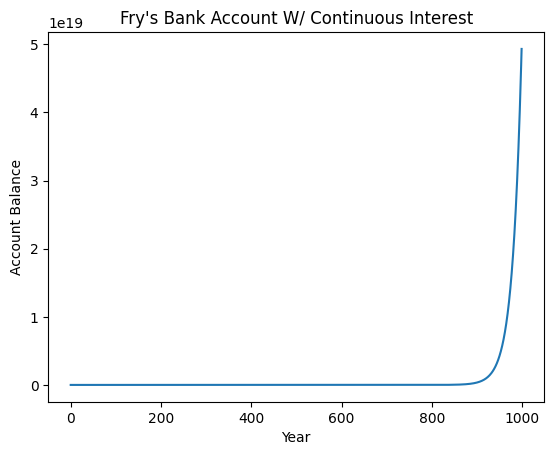

In [16]:
# X axis parameter:
xaxis = year

# Y axis parameter:
yaxis = bank_account


plt.xlabel('Year')
plt.ylabel('Account Balance')
plt.title("Fry's Bank Account W/ Continuous Interest")

plt.plot(xaxis, yaxis)
plt.show()

#NOTE:Graph looks a little wonky because of high variables on the y-axis. It causes it to look like there is no growth when there is a large growth that isnt large enough to be represented due to the scale of the graph.

## Part 2.A

In [17]:
#Part A
    #I didnt think it neccesary to create another array for 1-1000 since I already have one I can reuse.

#Part B
def simple_comp(array):
    annual_amount = []
    p = 0.01
    r = 0.05
    
    for i in array:
        total = p * (1 + (r*i))
        annual_amount.append(total)
    return annual_amount

account_balance = simple_comp(year)
account_balance

[0.01,
 0.0105,
 0.011000000000000001,
 0.0115,
 0.012,
 0.0125,
 0.013000000000000001,
 0.013500000000000002,
 0.013999999999999999,
 0.014499999999999999,
 0.015,
 0.015500000000000002,
 0.016,
 0.0165,
 0.017,
 0.0175,
 0.018000000000000002,
 0.018500000000000003,
 0.019,
 0.019500000000000003,
 0.02,
 0.020499999999999997,
 0.021,
 0.021500000000000005,
 0.022000000000000002,
 0.0225,
 0.023,
 0.0235,
 0.024000000000000004,
 0.0245,
 0.025,
 0.0255,
 0.026000000000000002,
 0.026500000000000003,
 0.027000000000000003,
 0.0275,
 0.027999999999999997,
 0.0285,
 0.029000000000000005,
 0.029500000000000002,
 0.03,
 0.030500000000000003,
 0.031000000000000003,
 0.0315,
 0.032,
 0.0325,
 0.033,
 0.0335,
 0.034,
 0.0345,
 0.035,
 0.035500000000000004,
 0.036000000000000004,
 0.036500000000000005,
 0.037000000000000005,
 0.0375,
 0.038000000000000006,
 0.0385,
 0.03900000000000001,
 0.0395,
 0.04,
 0.04050000000000001,
 0.040999999999999995,
 0.0415,
 0.042,
 0.0425,
 0.04300000000000001,
 

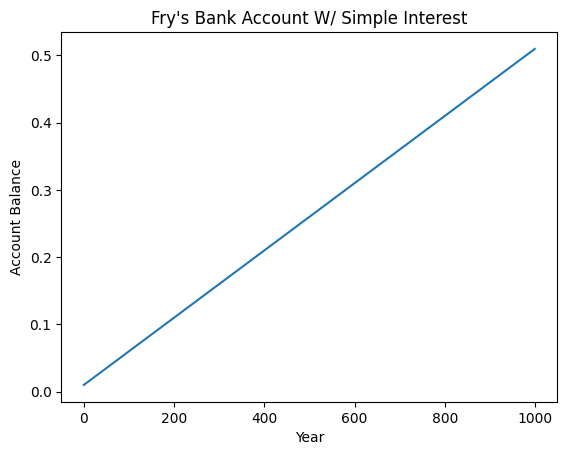

In [18]:
# X axis parameter:
xaxis = year

# Y axis parameter:
yaxis = account_balance


plt.xlabel('Year')
plt.ylabel('Account Balance')
plt.title("Fry's Bank Account W/ Simple Interest")

plt.plot(xaxis, yaxis)
plt.show()

## Part 2.B

In [19]:
# X axis parameter:
xaxis = year

# Y axis parameter:
difference = np.subtract(bank_account, account_balance)
yaxis = difference

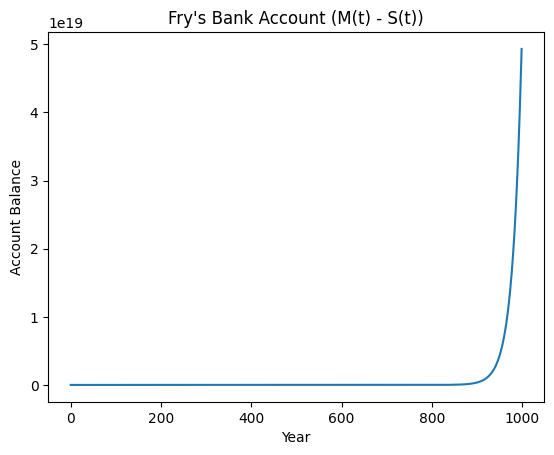

In [20]:
plt.xlabel('Year')
plt.ylabel('Account Balance')
plt.title("Fry's Bank Account (M(t) - S(t))")

plt.plot(xaxis, yaxis)
plt.show()

## Part 2.C

### Given the large number in the first array and smaller numbers in the second its hard to spot exactly what is going on. I looked at the individual arrays and saw that while the simple interest ended at around at 50 dollars at the end of the 1,000 years , the continous compunded interest ended in the billions if not trillions. Overall I learned that Continuous compounded interest is better than simple interest. Therefore, if I was Fry, I'd hope I invested in whatever bank offers continuously compunded interest.

# Exercise 3

## Part 1

### Here is my original randomwalk function

In [21]:
start = 0  
step_choice= ([0, 1])
walklength = 5 #num_steps

def RandomWalk(start):
    outcome = []
    current = start
    for i in range(walklength):
        step = np.random.choice(step_choice)
        if step == 0:
               current1 = current - 1
               outcome.append(current1)
        if step == 1:
               current2 = current + 1
               outcome.append(current2)

    current = np.sum(outcome)
    start = current
    return current
print("result of 1 trial:")
print(RandomWalk(start))  

#I realized my initial way of doing this was going to cause a lot of brackets and make it unreadable, so i needed to condense.

result of 1 trial:
-1


## Part 2
### Here is my updated randomwalk function

In [22]:
def randomwalk(num_steps,init_position):
    step = np.random.choice([0,1,2,3], size=num_steps)
    outcomes = init_position.tolist()
    
    for i in step:
        last_position = outcomes[-1]
        if i == 0:
            outcomes.append([last_position[0],last_position[-1]+1])
        elif i == 1:
            outcomes.append([last_position[0]+1,last_position[-1]])
        elif i == 2:
            outcomes.append([last_position[0],last_position[-1]-1])
        elif i == 3:
            outcomes.append([last_position[0]-1,last_position[-1]])
    return np.asarray(outcomes)

## Part 3

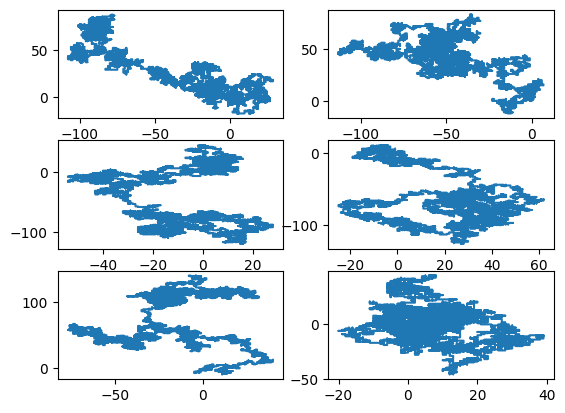

In [23]:
#Plot positions and count
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

constant = np.array([[0,0]])
a = 10000

#Values for each plot
walk1 = randomwalk(a, constant) #have to call multiple times so that each graph differs
x1,y1 = walk1.T

walk2 = randomwalk(a, constant)
x2,y2 = walk2.T

walk3 = randomwalk(a, constant)
x3,y3 = walk3.T

walk4 = randomwalk(a, constant)
x4,y4 = walk4.T

walk5 = randomwalk(a, constant)
x5,y5 = walk5.T

walk6 = randomwalk(a, constant)
x6,y6 = walk6.T

#Acutally drawing plots
ax1.plot(x1,y1)
ax2.plot(x2,y2)
ax3.plot(x3,y3)
ax4.plot(x4,y4)
ax5.plot(x5,y5)
ax6.plot(x6,y6)
plt.show()

## Part 4

### The plots are random and given the large number of steps our chances of getting the same walk again are small but not impossible. 

## Part 5

In [24]:
def randomwalk(num_steps,init_position):
    prob = [0.7,0.1,0.1,0.1]
    step = np.random.choice([0,1,2,3], size=num_steps, p=prob)
    outcomes = init_position.tolist()
    
    for i in step:
        last_position = outcomes[-1]
        if i == 0:
            outcomes.append([last_position[0],last_position[-1]+1])
        elif i == 1:
            outcomes.append([last_position[0]+1,last_position[-1]])
        elif i == 2:
            outcomes.append([last_position[0],last_position[-1]-1])
        elif i == 3:
            outcomes.append([last_position[0]-1,last_position[-1]])
    return np.asarray(outcomes)

## Part 6

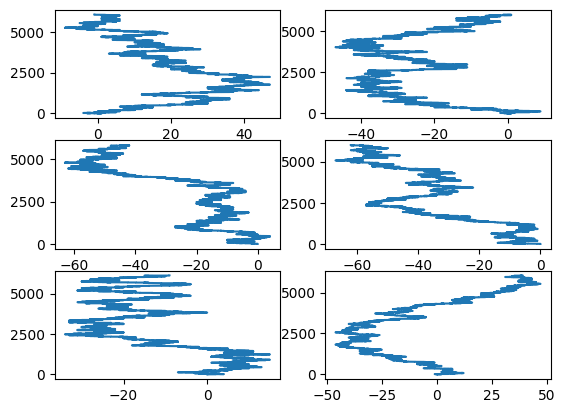

In [25]:
#Plot positions and count
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2)

constant = np.array([[0,0]])
a = 10000

#Values for each plot
walk1 = randomwalk(a, constant) #have to call multiple times so that each graph differs
x1,y1 = walk1.T

walk2 = randomwalk(a, constant)
x2,y2 = walk2.T

walk3 = randomwalk(a, constant)
x3,y3 = walk3.T

walk4 = randomwalk(a, constant)
x4,y4 = walk4.T

walk5 = randomwalk(a, constant)
x5,y5 = walk5.T

walk6 = randomwalk(a, constant)
x6,y6 = walk6.T

#Acutally drawing plots
ax1.plot(x1,y1)
ax2.plot(x2,y2)
ax3.plot(x3,y3)
ax4.plot(x4,y4)
ax5.plot(x5,y5)
ax6.plot(x6,y6)
plt.show()

## Part 7
### These graphs go up far more often than any other direction.

# Exercise 4

In [3]:
import random

## Part 1

In [20]:
class Card:
             
    def __init__(self, suit, val):
        self.val = val
        self.suit = suit
        self.__str__()
        
    def __str__(self):
        return '({} of {})'.format(self.val, self.suit)

## Part 2

In [21]:
class deck:             #Part 2.C
    
    def __init__(self, shuffled = False, num_cards = 0, show = False):
        self.num_cards = num_cards
        self.cards = []
        self.build()
        if shuffled == True:
            self.shuffle()
        if show == True:
            self.show()
        
    def build(self):
        suit = ('Spades', 'Clubs', 'Diamonds', 'Hearts')
        for suit in suit:
            for val in range(1, 14):
                self.cards.append(Card(suit, val))
            
    def show(self):
        for card in self.cards:
            print(card)
    
    def shuffle(self):
        num_cards = len(self.cards)
        for i in range(num_cards):
            a = random.randrange(i, num_cards)
            self.cards[i], self.cards[a] = self.cards[a], self.cards[i]  
            
    def hand_show(self):
        for i in hand:
            print(Card)
    
    
    def deal_cards(self, num_cards):
        hand = []
        for i in range(num_cards):
            hand.append(self.cards.pop(0))
        for card in hand:
            print(card)
            

In [22]:
#Part 1.B
deck = deck()
deck.deal_cards(3)

(1 of Spades)
(2 of Spades)
(3 of Spades)


## Part 3

In [23]:
class hand(deck):
      
    def __init__(self, num_cards = 0):
        self.num_cards = num_cards
        self.deal_cards(num_cards)
    
                    

In [24]:
hand()

TypeError: 'deck' object is not callable

## Part 4

## Part 5

# Bonus

Using the abalone data set from Exercise 1, implement a simple classifier (for example, look up k-nearest neighbors, or kNN, classifiers in sklearn) to try to classify the data.

You should split the data into a training set that has labels and a testing set that does not. You may use about 80% of the data as training and 20% as testing.
You should report the accuracy of your classifier on both the training and testing sets.
Write a brief description about how the classifer you choose works to do the classification.
Discuss your results.

In [32]:
!pip install scikit-learn

In [31]:
import sklearn as sl
from sklearn.datasets import

In [184]:
#My dataframe
data = pd.read_csv('abalone.data')
data.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9]

#turn sex to numerical value
data.replace(('I', 'M', 'F'), (0, 1, 2), inplace=True)

#turn into a readable form for sklearn
data.to_string()


'      1      2      3      4       5       6       7       8   9\n0     1  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7\n1     2  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9\n2     1  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10\n3     0  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7\n4     0  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.1200   8\n5     2  0.530  0.415  0.150  0.7775  0.2370  0.1415  0.3300  20\n6     2  0.545  0.425  0.125  0.7680  0.2940  0.1495  0.2600  16\n7     1  0.475  0.370  0.125  0.5095  0.2165  0.1125  0.1650   9\n8     2  0.550  0.440  0.150  0.8945  0.3145  0.1510  0.3200  19\n9     2  0.525  0.380  0.140  0.6065  0.1940  0.1475  0.2100  14\n10    1  0.430  0.350  0.110  0.4060  0.1675  0.0810  0.1350  10\n11    1  0.490  0.380  0.135  0.5415  0.2175  0.0950  0.1900  11\n12    2  0.535  0.405  0.145  0.6845  0.2725  0.1710  0.2050  10\n13    2  0.470  0.355  0.100  0.4755  0.1675  0.0805  0.1850  10\n14    1  

In [189]:
#Split data set into attributes and labels
x = data.iloc[:, :-1]
y = data.iloc[:, 8]

In [190]:
#training and testing split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20) # splits 75%/25% by default

In [191]:
#Scale features so they can all be evalutated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [216]:
# add classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [217]:
y_pred = classifier.predict(x_test)

In [218]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.29      0.38      0.33        13
           5       0.28      0.29      0.29        24
           6       0.27      0.29      0.28        59
           7       0.23      0.33      0.27        76
           8       0.20      0.30      0.24        94
           9       0.24      0.31      0.27       140
          10       0.22      0.21      0.21       141
          11       0.19      0.21      0.20        85
          12       0.07      0.04      0.05        55
          13       0.10      0.05      0.06        42
          14       0.00      0.00      0.00        34
          15       0.00      0.00      0.00        20
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         8
          19       0.00    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

# Conclusion
### For my classifer I used the kNN classifier. The kNN classifer relies on proximity to create a prediction on what class the new data point. Thus, the greater number the neighbors the greater accuracy. 

### When I use 5 neighbors, my prediction accuracy is 0.21

In [ ]:
#please have mercy on me, I need a 95 to get an A in this course